# Assignment 01

## 20133807 Jeong Seong Woon

### import modules

In [413]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [414]:
def noise(p,nx,ny):
    s = np.empty((2,len(nx)),dtype=float)
    for i in range(len(nx)):
        s[0][i] = p[0] + nx[i]
        s[1][i] = p[1] + ny[i]
    return s

### make 2 center points and many noised points

#### draw train data

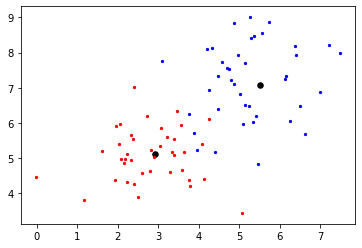

In [415]:
np.random.seed(3)
point1 = 10*np.random.rand(2)
point2 = 10*np.random.rand(2)

noise_num = 40
p1_noise_train = np.random.normal(0,1,size = (2,noise_num))
p2_noise_train = np.random.normal(0,1,size = (2,noise_num))
p1_noise_test = np.random.normal(0,1,size = (2,noise_num))
p2_noise_test = np.random.normal(0,1,size = (2,noise_num))


point1_noise_train = noise(point1, p1_noise_train[0], p1_noise_train[1])
point2_noise_train = noise(point2, p2_noise_train[0], p2_noise_train[1])
point1_noise_test = noise(point1, p1_noise_test[0], p1_noise_test[1])
point2_noise_test = noise(point2,p2_noise_test[0], p2_noise_test[1])

label_point1 = np.zeros((noise_num,1))
label_point2 = np.ones((noise_num,1))

 
plt.scatter(point1[0],point1[1],s=30,c='k')
plt.scatter(point2[0],point2[1],s=30,c='k')
plt.scatter(point1_noise_train[0], point1_noise_train[1], s = 5, c='b')
plt.scatter(point2_noise_train[0], point2_noise_train[1], s = 5, c='r')

#### draw test data

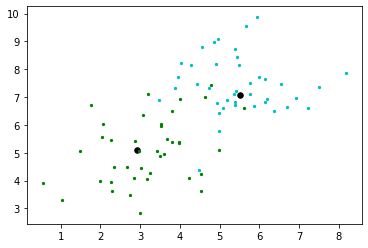

In [416]:
plt.scatter(point1[0],point1[1],s=30,c='k')
plt.scatter(point2[0],point2[1],s=30,c='k')
plt.scatter(point1_noise_test[0], point1_noise_test[1], s = 5, c='c')
plt.scatter(point2_noise_test[0], point2_noise_test[1], s = 5, c='g')

### sigmoid function

In [417]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

### make array for training & testing

In [418]:
points_train = np.hstack([point1_noise_train, point2_noise_train])
label = np.vstack([label_point1, label_point2])
points_trainT = points_train.T
points_test = np.hstack([point1_noise_test, point2_noise_test])
points_testT = points_test.T

In [419]:
(p,n) =points_trainT.shape

### make w array for training

In [420]:
w = np.zeros((n+1,1))
ones = np.ones((p,1))

In [421]:
points_trainT = np.hstack((ones,points_trainT))
points_testT = np.hstack((ones,points_testT))

### Define loss Function

In [422]:
def lossFunc(w,X,Y):
    m = len(Y)
    result = (-1/m) * np.sum(np.multiply(Y,np.log(sigmoid(np.dot(X,w))))+np.multiply((1-Y), np.log(1-sigmoid(np.dot(X,w)))))    
    return result

### Define Accurcy Function

In [423]:
def accuracy(X, w):
    return sigmoid(np.dot(X,w)) >= 0.5

In [424]:
loss_list = []
loss_list_test = []
accuracy_list = []
accuracy_list_test = []

### Implement gradientDescent

In [425]:
def gradientDescent(X, Y, w, l_rate):  
    m = len(Y)
    iterations = 0
    old = lossFunc(w,points_trainT,label)
    test = lossFunc(w,points_testT,label)
    accuracy_train = (accuracy(points_trainT,w) == label).sum() / len(label)
    accuracy_test = (accuracy(points_testT,w) == label).sum() / len(label)
    while(iterations<10000):
        iterations += 1
        loss_list.append(old)
        loss_list_test.append(test)
        accuracy_list.append(accuracy_train)
        accuracy_list_test.append(accuracy_test)
        w = w - (l_rate/m)*np.dot(X.T, sigmoid(np.dot(X,w))-Y)
        old = lossFunc(w,points_trainT,label)
        test = lossFunc(w,points_testT,label)
        accuracy_train = (accuracy(points_trainT,w) == label).sum() / len(label)
        accuracy_test = (accuracy(points_testT,w) == label).sum() / len(label)
    return w

### Apply GradientDescent Algorithm for training w

In [426]:
w = gradientDescent(points_trainT,label,w,0.05)

### Plot loss at every iteration

#### Training data set

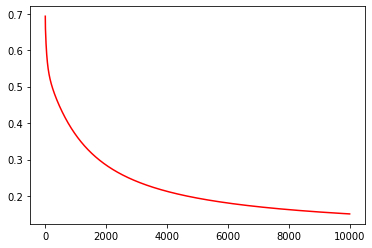

In [427]:
plt.plot(loss_list, 'r')

#### Test data set

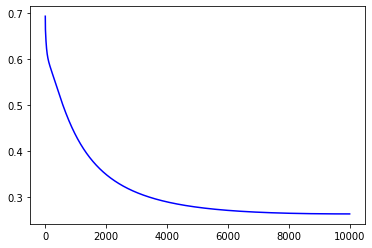

In [428]:
plt.plot(loss_list_test, 'b')

### Plot Accuracy

#### Training data set

In [ ]:
plt.plot(accuracy_list, 'r')

#### Test data set

In [ ]:
plt.plot(accuracy_list_test, 'b')

### Plot classifier

In [389]:
def line(x):
    return (-w[0] - (w[1]*x))/w[2]

In [404]:
line_x = np.linspace(points_train[0].min(),points_train[0].max(),10)
line_y = line(line_x)

#### Apply to Training data set

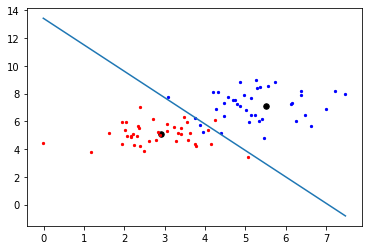

In [405]:
plt.plot(line_x,line_y)
plt.scatter(point1[0],point1[1],s=30,c='k')
plt.scatter(point2[0],point2[1],s=30,c='k')
plt.scatter(point1_noise_train[0], point1_noise_train[1], s = 5, c='b')
plt.scatter(point2_noise_train[0], point2_noise_train[1], s = 5, c='r')

#### Apply to test dataset

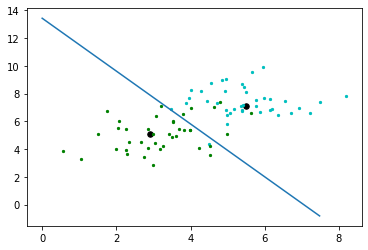

In [406]:
plt.plot(line_x,line_y)
plt.scatter(point1[0],point1[1],s=30,c='k')
plt.scatter(point2[0],point2[1],s=30,c='k')
plt.scatter(point1_noise_test[0], point1_noise_test[1], s = 5, c='c')
plt.scatter(point2_noise_test[0], point2_noise_test[1], s = 5, c='g')